- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

Neal Gordon  
2017-02-20  

- - - -


## Plotting 

to plot inline in the ipython console or jupyter notebook, otherwise plots will be in the a seperate window

to turn on inline plotting
```python
from IPython import get_ipython
get_ipython().magic('matplotlib inline')
#or
%matplotlib inline
```

to turn off inline plotting
```python
get_ipython().magic('matplotlib')
#or
%matplotlib
#or 
%matplotlib qt
```

In [2]:
%matplotlib inline

# set figure size and font size for notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

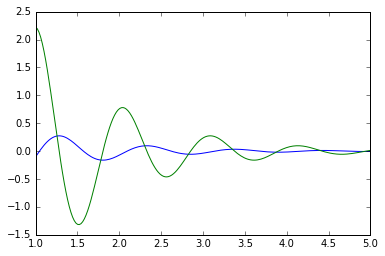

In [38]:
# one way to plot using symbolic math
x = sp.var('x')
f =  sp.sin(6*x)*sp.exp(-x)
df = f.diff()
w = np.array([f.subs(x,k) for k in z])
dw = np.array([df.subs(x,k) for k in z])

plt.plot(z,w,z,dw);

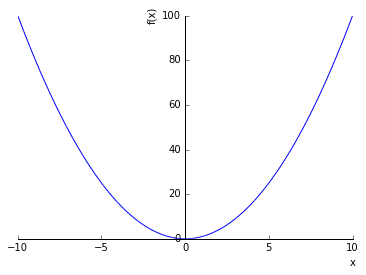

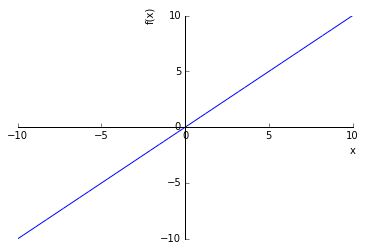

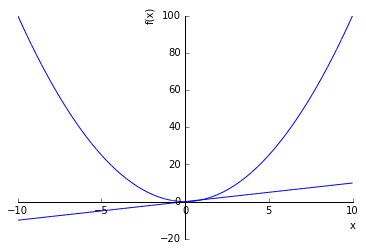

In [39]:
#%% Sympy Plotting

# shows two plots together
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1.show()

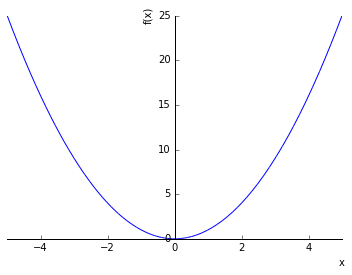

In [83]:
#single plot with range
plot(x**2, (x,-5,5));

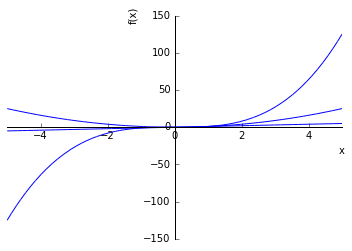

In [84]:
#multiple plots with range
plot(x,x**2,x**3, (x,-5,5))

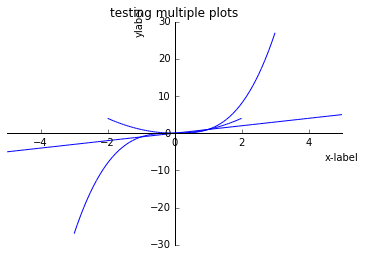

In [85]:
#multiple plots with different ranges
plot( (x, (x,-5,5)), (x**2, (x,-2,2)), (x**3, (x,-3,3)), 
     title='testing multiple plots',
     xlabel='x-label',
     ylabel='ylabel')

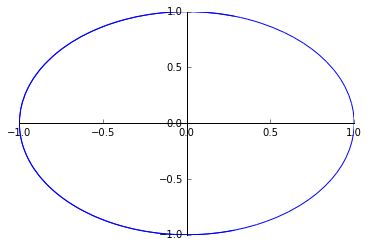

In [86]:
# parametric plots
from sympy import symbols, cos,sin
from sympy.plotting import plot_parametric
u = symbols('x')
plot_parametric(cos(u), sin(u), (u,-5,5))

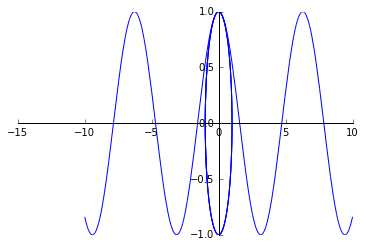

In [87]:
#multiple parametric plots with a single range
plot_parametric((cos(u), sin(u)), (u,cos(u)))

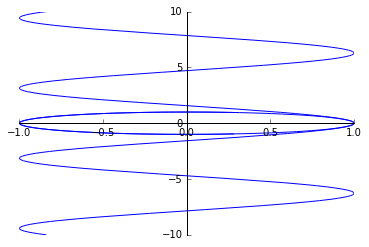

In [88]:
# multiple parametric plots with multiple ranges
plot_parametric((cos(u), sin(u), (u,-5,5)), (cos(u), u, (u,-10,10)))

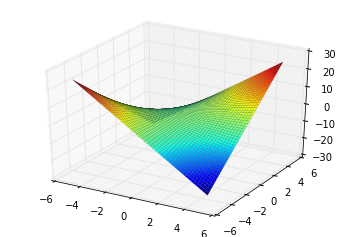

In [89]:
# 3d plots
from sympy import symbols
from sympy.plotting import plot3d
x,y = symbols('x,y')
plot3d(x*y, (x,-5,5), (y,-5,5))

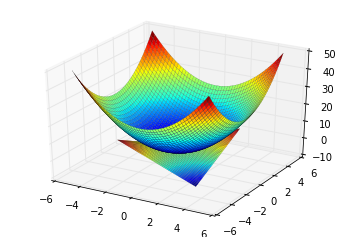

In [90]:
# multiple plots with multiple ranges
plot3d((x**2+y**2, (x,-5,5), (y,-5,5)) , (x*y, (x,-3,3), (y,-3,3)))

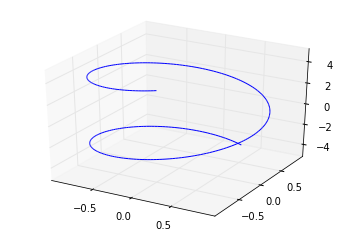

In [91]:
# 3d parametric plots
from sympy import symbols, sin,cos
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
plot3d_parametric_line(cos(u), sin(u), u, (u,-5,5))

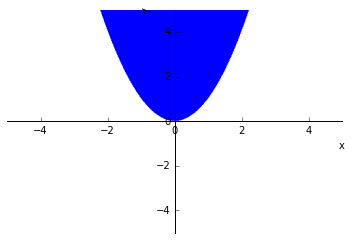

In [92]:
#plotting regions
p6 = plot_implicit(y>x**2)

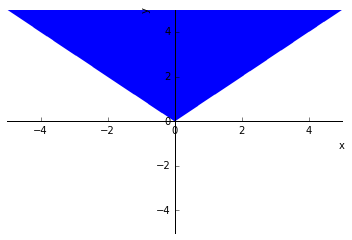

In [93]:
#plotting using boolean
p7 = plot_implicit(And(y>x, y >=-x))

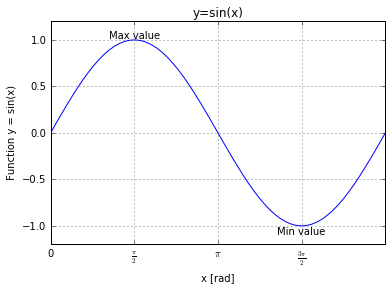

In [97]:
from numpy import pi, sin
I = np.arange(0, 2*pi+0.1, 0.1)
plt.plot(I,sin(I), label='sin(I)')
plt.title('y=sin(x)')
plt.xlabel('x [rad]')
plt.ylabel(' Function y = sin(x)')
plt.text(pi/2,1, 'Max value', ha = 'center', va='bottom')
plt.text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
plt.xticks(np.arange(0, 2*pi, pi/2), 
       ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
plt.xlim([0, 2*pi])
plt.ylim([-1.2, 1.2])
plt.grid() 

### Drawing and Diagrams
[index](#Mechpy)

to install pysketcher run these commands for a windows machine

check out tutorials
http://hplgit.github.io/pysketcher/doc/pub/tutorial/._pysketcher002.html  


```bash  
pip install future
choco install imagemagick -y # make sure to run as admin
git clone https://github.com/hplgit/pysketcher
cd pysketcher/
python setup.py install
```

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

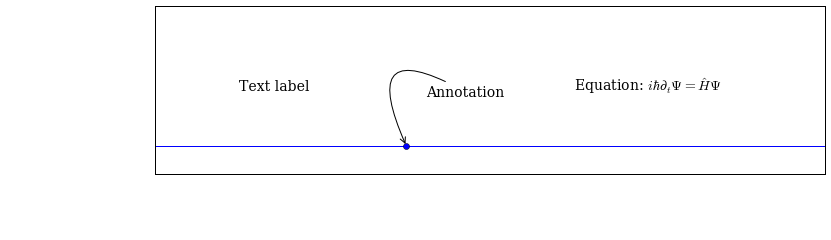

In [3]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=1.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

ax.annotate('arc3', xy=(0.5, -1), xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
            )

ax.annotate('arc', xy=(1., 1), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=30,rad=10"),
            )

ax.annotate('arc', xy=(1.5, -1), xycoords='data',
            xytext=(-40, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=20,angleB=-90,armB=15,rad=7"),
            )
plt.show()

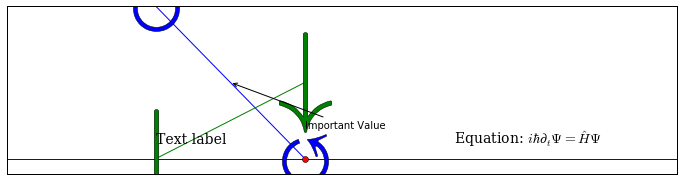

In [4]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-1, 3.5)
ax.set_ylim(-0.1, 1)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

plt.annotate("Important Value", (.5,.5), xycoords='data',xytext=(1,.2), arrowprops=dict(arrowstyle='->'))


ax.plot([1,0],marker=r'$\circlearrowleft$',ms=50)
ax.plot([0,.5],marker=r'$\downarrow$',ms=100)

ax.plot(1, 0, 'o')

In [1]:
def test_Spring():
    L = 5.0
    W = 2.0

    drawing_tool.set_coordinate_system(
        xmin=0, xmax=7*W, ymin=-L/2, ymax=1.5*L,
        axis=True, instruction_file='tmp_Spring.py')
    drawing_tool.set_linecolor('blue')
    drawing_tool.set_grid(True)

    xpos = W
    s1 = Spring((W,0), L, teeth=True)
    s1_title = Text('Default Spring',
                    s1.geometric_features()['end'] + point(0,L/10))
    s1.draw()
    s1_title.draw()
    #s1.draw_dimensions()
    xpos += 3*W
    s2 = Spring(start=(xpos,0), length=L, width=W/2.,
                bar_length=L/6., teeth=False)
    s2.draw()
    s2.draw_dimensions()
    drawing_tool.display('Spring')
test_Spring()

NameError: name 'drawing_tool' is not defined

In [2]:
def test_Dashpot():
    L = 5.0
    W = 2.0
    xpos = 0

    drawing_tool.set_coordinate_system(
        xmin=xpos, xmax=xpos+5.5*W, ymin=-L/2, ymax=1.5*L,
        axis=True, instruction_file='tmp_Dashpot.py')
    drawing_tool.set_linecolor('blue')
    drawing_tool.set_grid(True)

    # Default (simple) dashpot
    xpos = 1.5
    d1 = Dashpot(start=(xpos,0), total_length=L)
    d1_title = Text('Dashpot (default)',
                    d1.geometric_features()['end'] + point(0,L/10))
    d1.draw()
    d1_title.draw()

    # Dashpot for animation with fixed bar_length, dashpot_length and
    # prescribed piston_pos
    xpos += 2.5*W
    d2 = Dashpot(start=(xpos,0), total_length=1.2*L, width=W/2,
                 bar_length=W, dashpot_length=L/2, piston_pos=2*W)
    d2.draw()
    d2.draw_dimensions()

    drawing_tool.display('Dashpot')
test_Dashpot()    

NameError: name 'drawing_tool' is not defined

In [ ]:
## https://github.com/hplgit/pysketcher/blob/master/examples/beam2.py

"""A more sophisticated beam than in beam1.py."""
from pysketcher import *

def beam():
    L = 8.0
    a = 3*L/4
    b = L - a
    H = 1.0
    xpos = 0.0
    ypos = 3.0

    drawing_tool.set_coordinate_system(
        xmin=-3, xmax=xpos+1.5*L,
        ymin=0, ymax=ypos+5*H,
        axis=False)
    drawing_tool.set_linecolor('blue')
    #drawing_tool.set_grid(True)
    drawing_tool.set_fontsize(16)

    A = point(xpos,ypos)

    beam = Rectangle(A, L, H)

    h = L/16  # size of support, clamped wall etc

    clamped = Rectangle(A - point(h,0) - point(0,2*h), h,
                        6*h).set_filled_curves(pattern='/')

    load = ConstantBeamLoad(A + point(0,H), L, H)
    load.set_linewidth(1).set_linecolor('black')
    load_text = Text('$w$',
                     load.geometric_features()['mid_top'] +
                     point(0,h/2.))

    B = A + point(a, 0)
    C = B + point(b, 0)

    support = SimplySupportedBeam(B, h)  # pt B is simply supported


    R1 = Force(A-point(0,2*H), A, '$R_1$', text_spacing=1./50)
    R1.set_linewidth(3).set_linecolor('black')
    R2 = Force(B-point(0,2*H),
               support.geometric_features()['mid_support'],
               '$R_2$', text_spacing=1./50)
    R2.set_linewidth(3).set_linecolor('black')
    M1 = Moment('$M_1$', center=A + point(-H, H/2), radius=H/2,
                left=True, text_spacing=1/30.)
    M1.set_linecolor('black')

    ab_level = point(0, 3*h)
    a_dim = Distance_wText(A - ab_level, B - ab_level, '$a$')
    b_dim = Distance_wText(B - ab_level, C - ab_level, '$b$')
    dims = Composition({'a': a_dim, 'b': b_dim})
    symbols = Composition(
        {'R1': R1, 'R2': R2, 'M1': M1,
         'w': load, 'w text': load_text,
         'A': Text('$A$', A+point(0.7*h,-0.9*h)),
         'B': Text('$B$',
                   support.geometric_features()['mid_support']-
                   point(1.25*h,0)),
         'C': Text('$C$', C+point(h/2,-h/2))})

    x_axis = Axis(A + point(L+h, H/2), 2*H, '$x$',).\
             set_linecolor('black')
    y_axis = Axis(A + point(0,H/2), 3.5*H, '$y$',
                  label_alignment='left',
                  rotation_angle=90).set_linecolor('black')
    axes = Composition({'x axis': x_axis, 'y axis': y_axis})

    annotations = Composition({'dims': dims, 'symbols': symbols,
                               'axes': axes})
    beam = Composition({'beam': beam, 'support': support,
                        'clamped end': clamped, 'load': load})

    def deflection(x, a, b, w):
        import numpy as np
        R1 = 5./8*w*a - 3*w*b**2/(4*a)
        R2 = 3./8*w*a + w*b + 3*w*b**2/(4*a)
        M1 = R1*a/3 - w*a**2/12
        y = -(M1/2.)*x**2 + 1./6*R1*x**3 - w/24.*x**4 + \
            1./6*R2*np.where(x > a, 1, 0)*(x-a)**3
        return y

    x = linspace(0, L, 101)
    y = deflection(x, a, b, w=1.0)
    y /= abs(y.max() - y.min())
    y += ypos + H/2

    elastic_line = Curve(x, y).\
                   set_linecolor('red').\
                   set_linestyle('dashed').\
                   set_linewidth(3)

    beam.draw()
    drawing_tool.display()
    drawing_tool.savefig('tmp_beam2_1')

    import time
    time.sleep(1.5)

    annotations.draw()
    drawing_tool.display()
    drawing_tool.savefig('tmp_beam2_2')
    time.sleep(1.5)

    elastic_line.draw()
    drawing_tool.display()
    drawing_tool.savefig('tmp_beam2_3')
    #beam.draw_dimensions()
    #test_Dashpot(xpos+2*W)

beam()
input()